In [ ]:
!pip install roboflow
!pip install ultralytics

In [7]:
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image
import os

In [ ]:
api = 'xxxxxxxxxxxxxxxxx'
rf = Roboflow(api_key=api)
project = rf.workspace().project("moroccan-coins-vk0qe")
version = project.version(1)
dataset = version.download("yolov8", location="./moroccan_coins")
print(os.listdir("./moroccan_coins"))

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ./moroccan_coins in yolov8:: 100%|██████████| 2700/2700 [00:00<00:00, 6449.36it/s]

['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'data.yaml', 'valid']


In [ ]:
datayaml = '/content/moroccan_coins/data.yaml'
yolo_version = 'yolov8l.pt'
def train(yaml, modelversion, batch, image_size, lr,epochs=100, augment=True ,patience=5):
    if os.path.exists(yaml):
      model = YOLO(modelversion)
      model.train(
          data = yaml ,
          epochs = epochs ,
          batch = batch ,
          imgsz = image_size ,
          augment = augment ,
          patience = patience ,
          lr0 = lr
      )
    else:
       print(f"path : {yaml} doesn't exist")
train(
      yaml=datayaml ,
      modelversion= yolo_version ,
      epochs = 120 ,
      batch=16 ,
      image_size = 416 ,
      augment= True ,
      patience = 10 ,
      lr = 0.01
      )

In [6]:
train = '/content/runs/detect/train'
best = '/content/runs/detect/train/weights/best.pt'
best_model = YOLO(best)
print(os.listdir(train))

['BoxR_curve.png', 'labels_correlogram.jpg', 'results.png', 'BoxPR_curve.png', 'BoxF1_curve.png', 'results.csv', 'train_batch1.jpg', 'labels.jpg', 'val_batch0_labels.jpg', 'train_batch2.jpg', 'confusion_matrix.png', 'val_batch1_pred.jpg', 'val_batch1_labels.jpg', 'val_batch0_pred.jpg', 'BoxP_curve.png', 'weights', 'confusion_matrix_normalized.png', 'args.yaml', 'train_batch0.jpg']


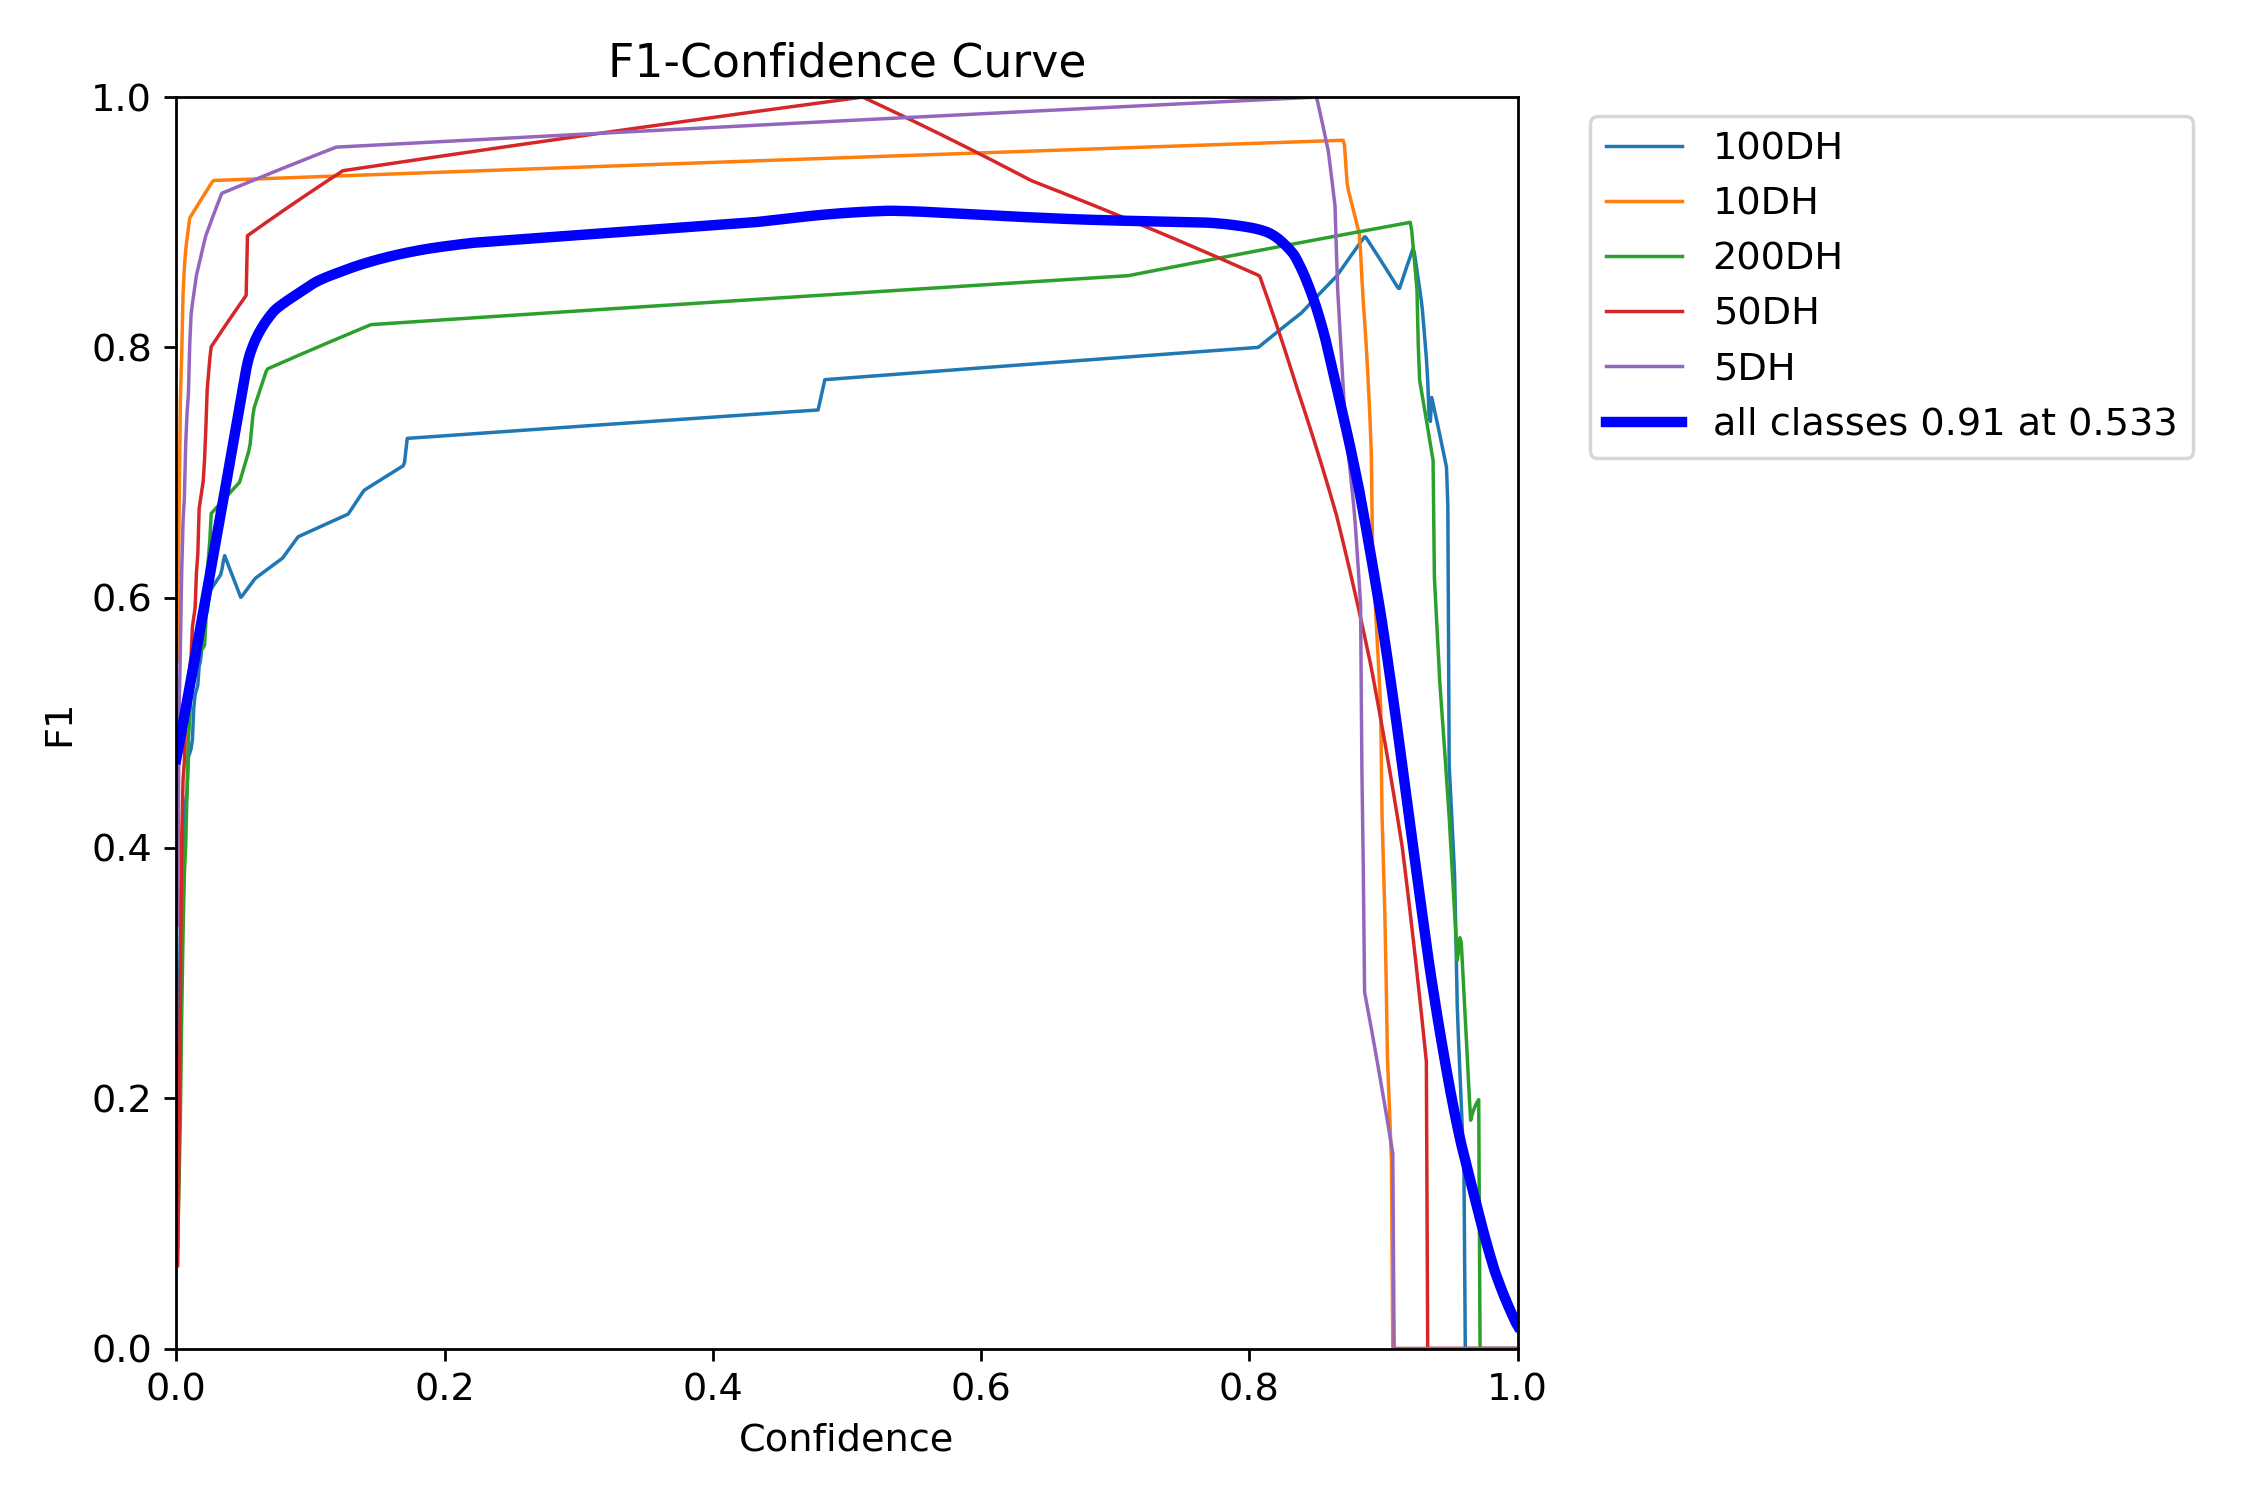

In [9]:
f1_curve = '/content/runs/detect/train/BoxF1_curve.png'
display(Image(filename = f1_curve , height = 500))

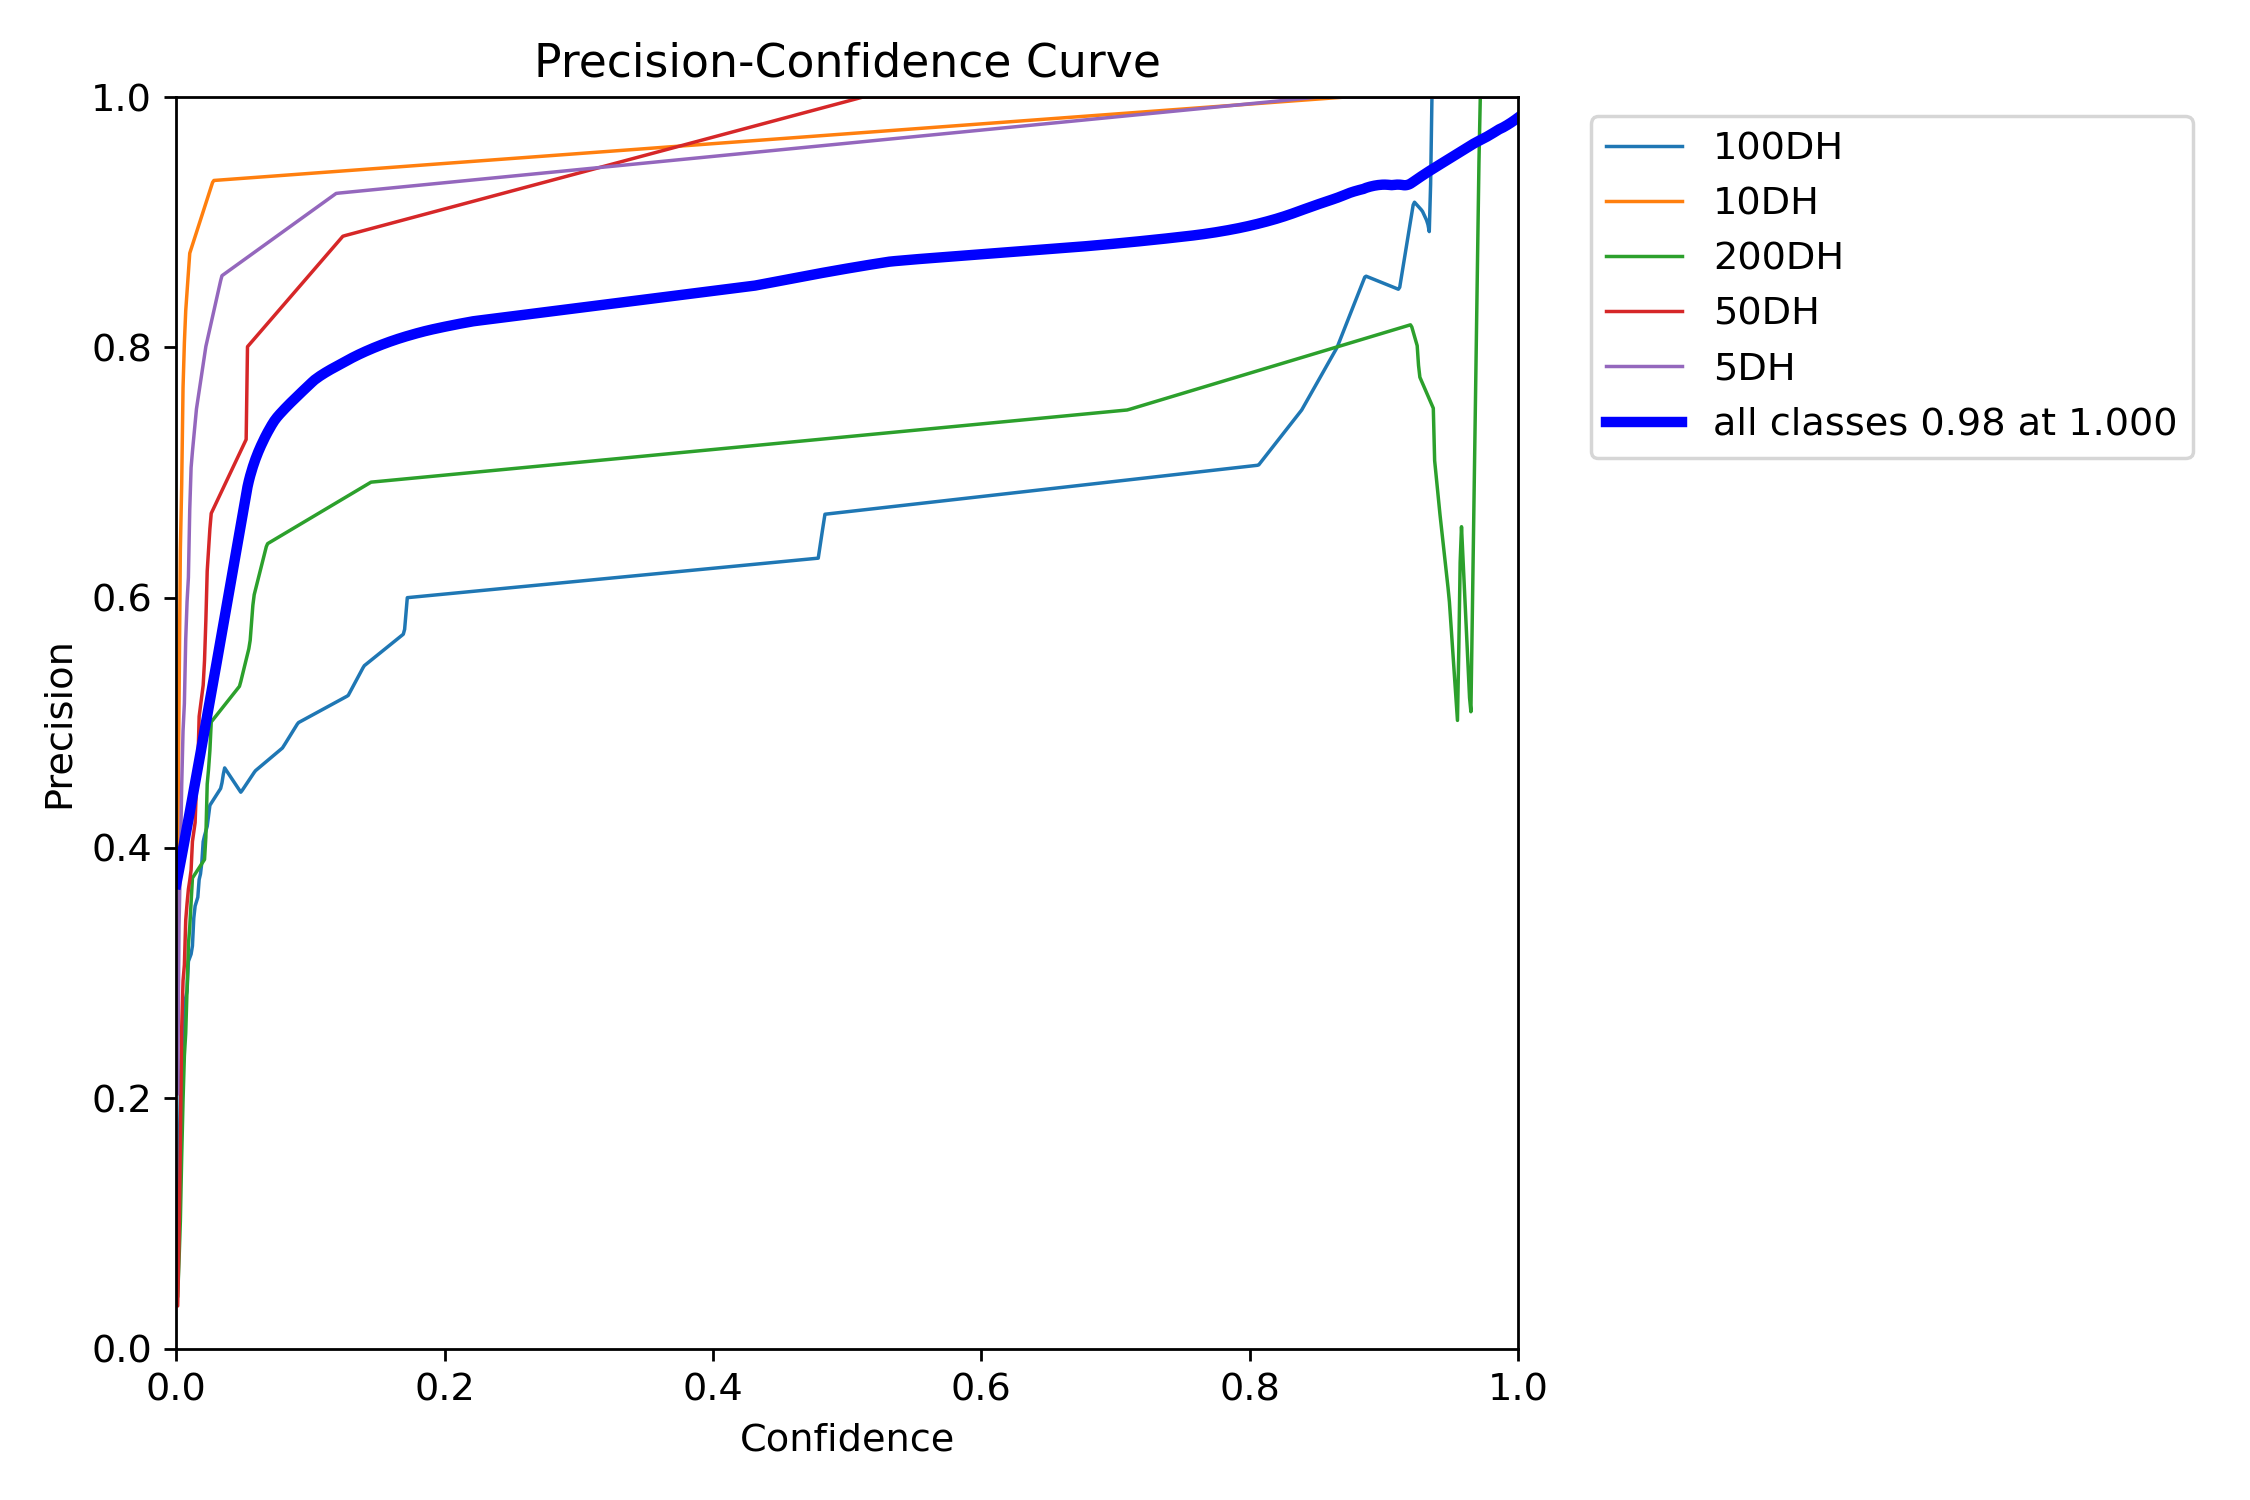

In [14]:
pcurve = '/content/runs/detect/train/BoxP_curve.png'
display(Image(filename = pcurve , height = 550, width = 900))

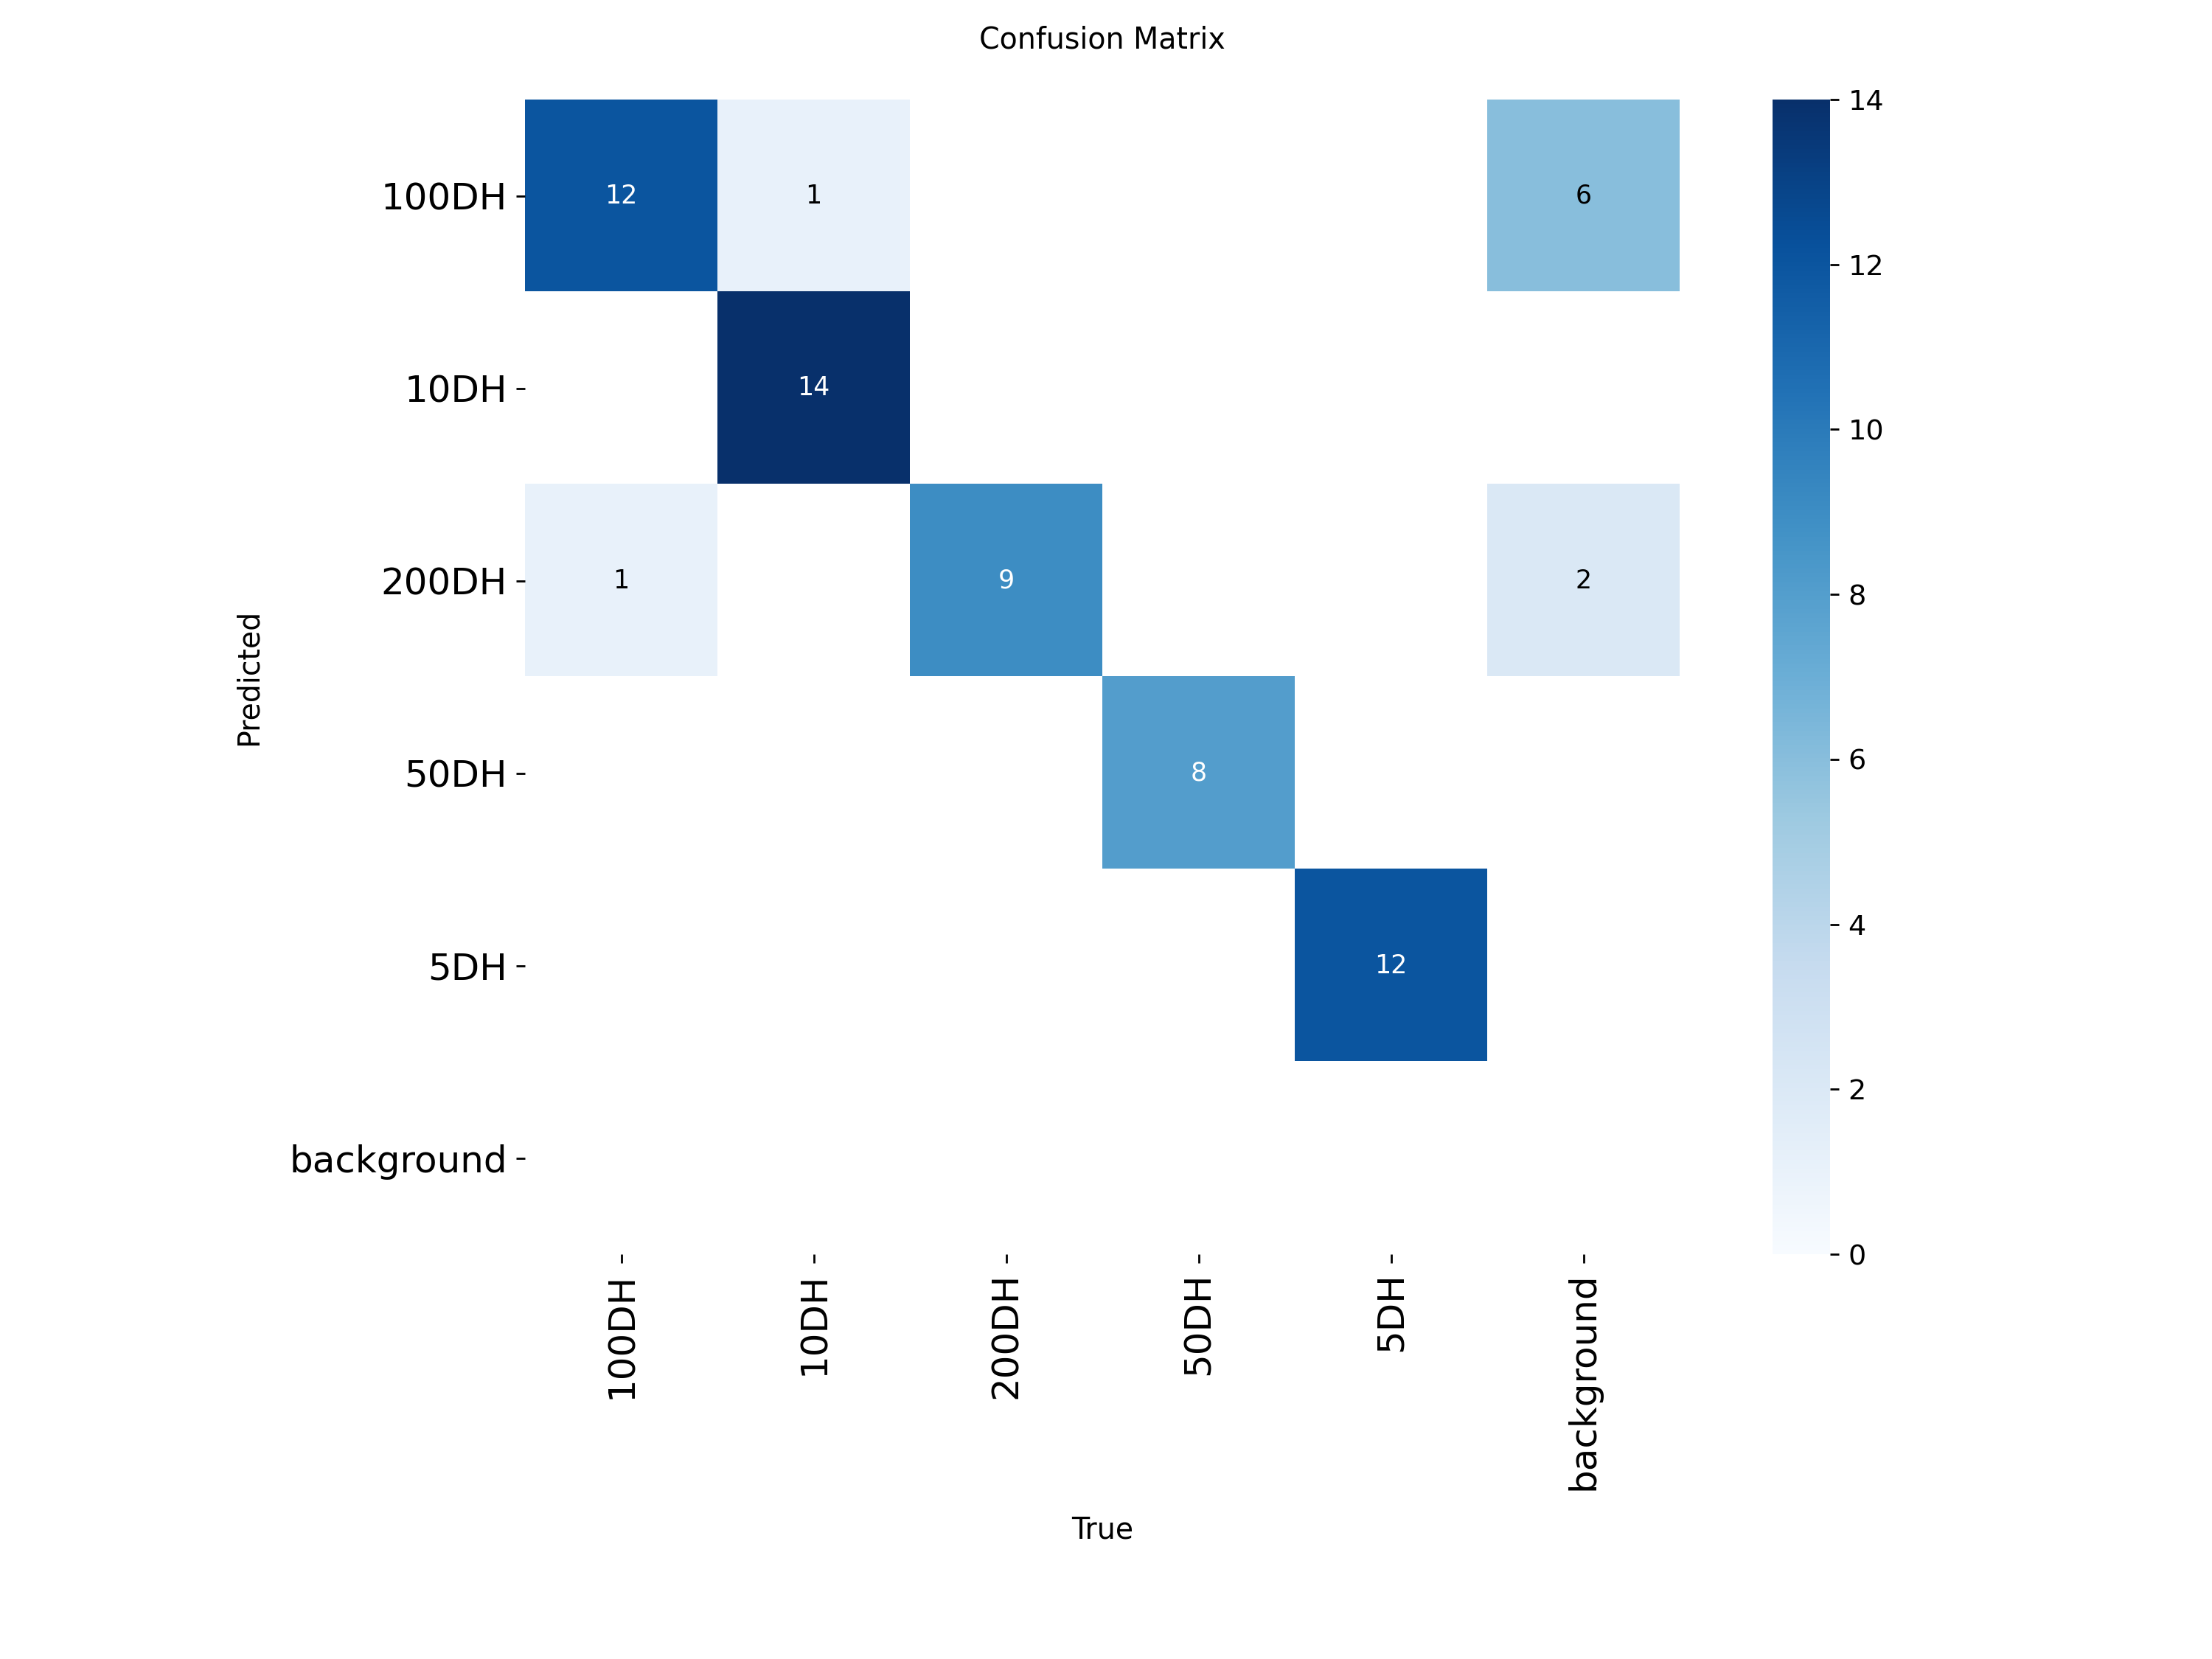

In [15]:
ConfusionMatrix = '/content/runs/detect/train/confusion_matrix.png'
display(Image(filename= ConfusionMatrix, height = 550, width = 900))

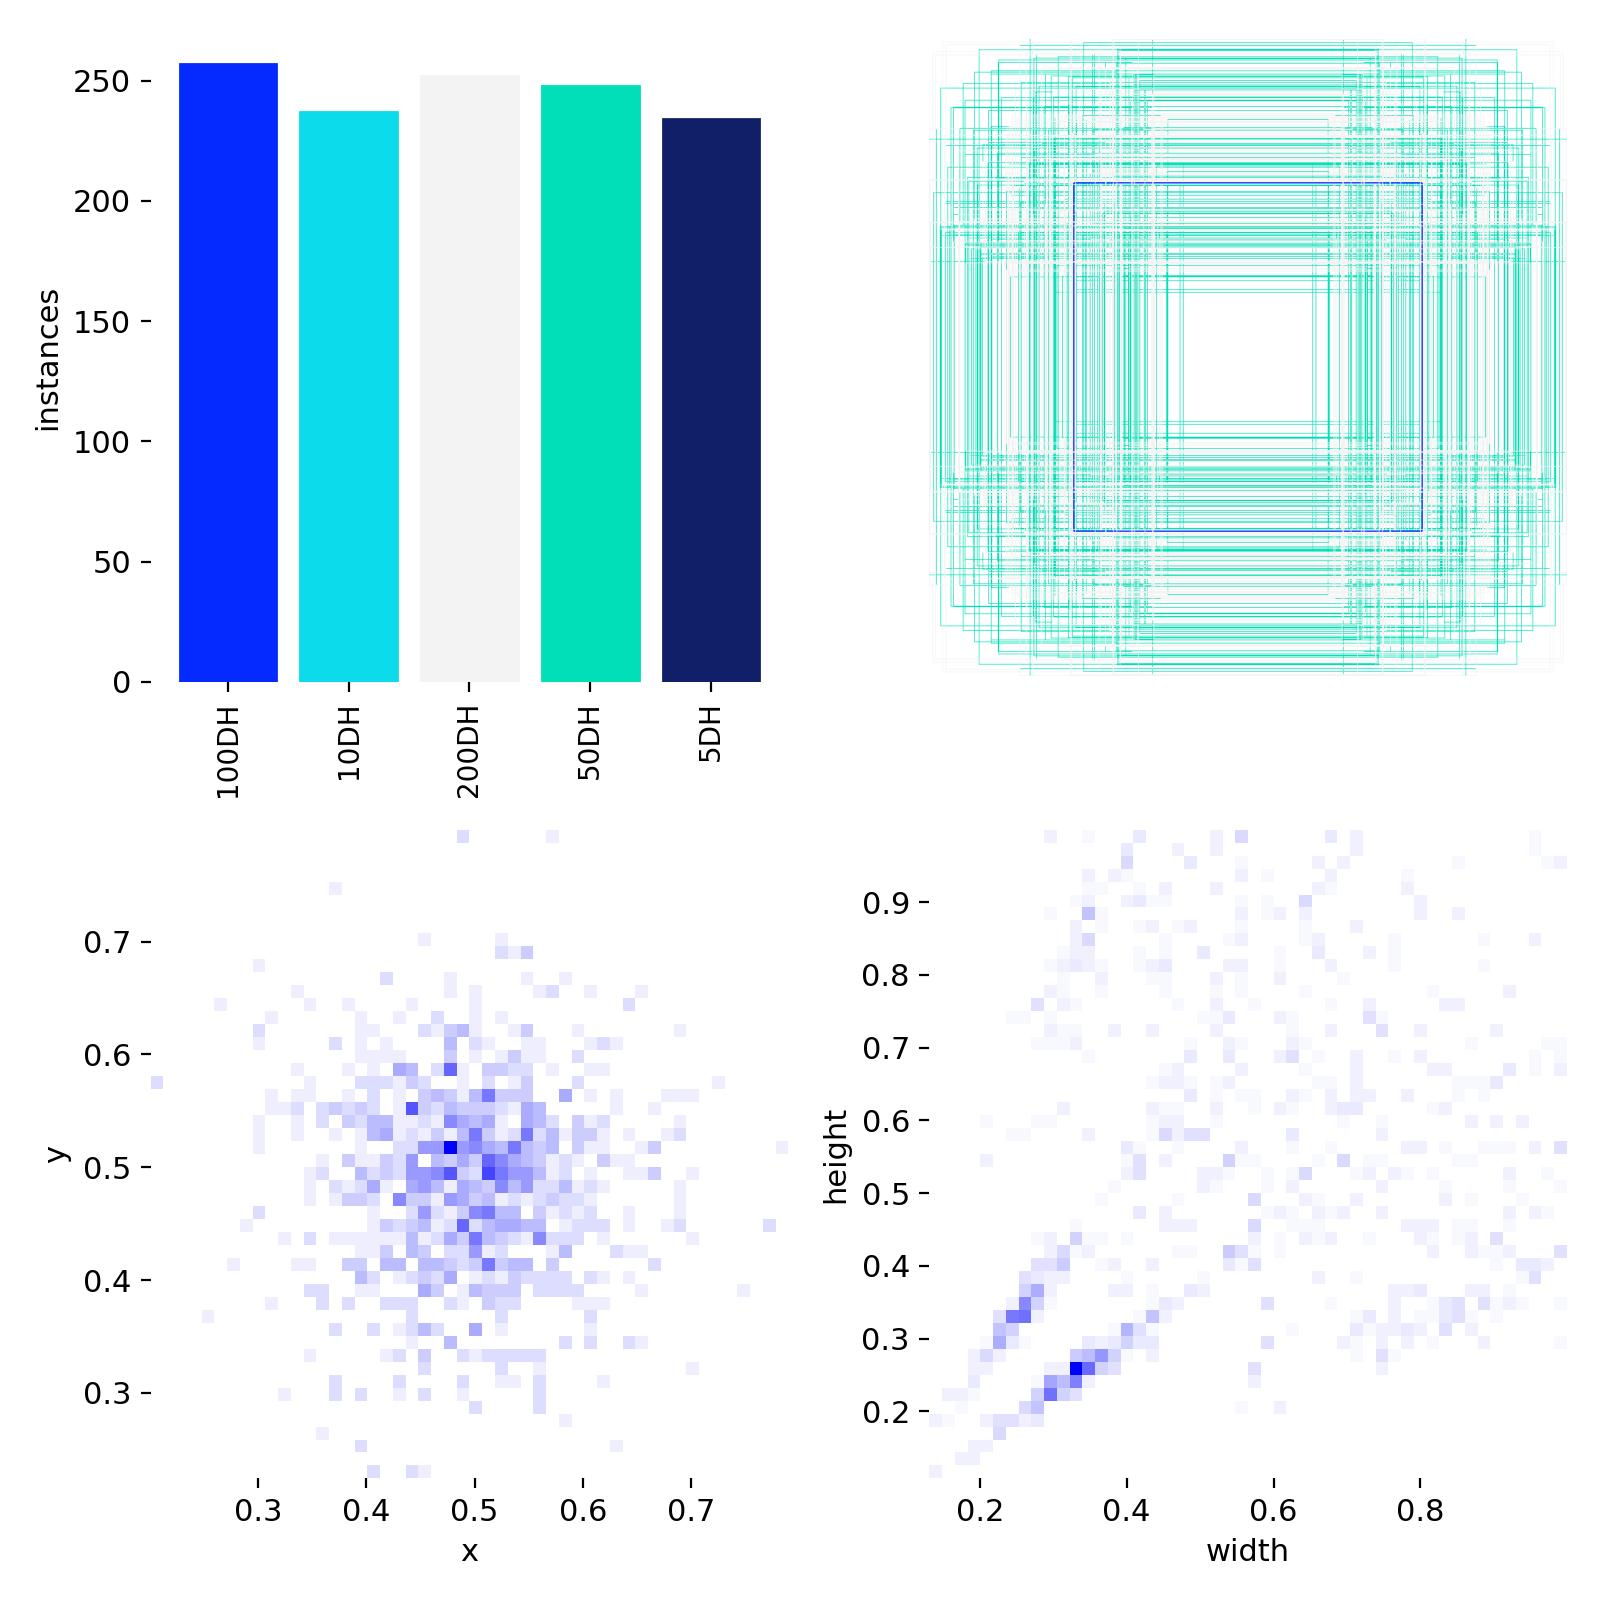

In [21]:
labels = '/content/runs/detect/train/labels.jpg'
display(Image(filename = labels, height = 600, width = 1200))

In [28]:
Results = '/content/runs/detect/train/results.csv'
import pandas as pd
data = pd.read_csv(Results)
data.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,32.3935,0.73867,1.50785,1.24178,0.26074,0.39060,0.16301,0.13785,1.52354,70.93220,2.13076,0.000366,0.000366,0.000366
1,2,63.2471,0.98111,1.24449,1.40618,0.14817,0.24112,0.12249,0.07531,1.83251,8.65593,2.64802,0.000730,0.000730,0.000730
2,3,93.2040,1.06713,1.20617,1.47634,0.20240,0.30427,0.22163,0.15297,1.68144,4.97916,2.83906,0.001088,0.001088,0.001088
3,4,126.8120,1.06494,1.15985,1.48942,0.71504,0.52316,0.54123,0.27028,1.77481,1.91059,2.63555,0.001084,0.001084,0.001084
4,5,157.8260,0.98035,1.00244,1.41873,0.79674,0.75523,0.80563,0.53975,0.98591,1.48018,1.67377,0.001074,0.001074,0.001074


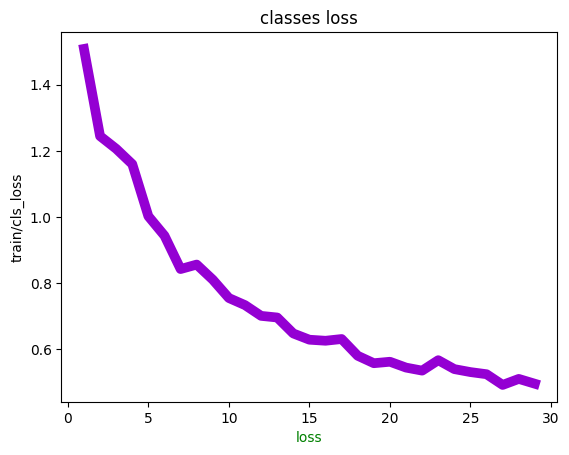

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='epoch' , y='train/cls_loss' , data = data, linewidth=7, c='darkviolet')
plt.title("classes loss")
plt.xlabel("epochs" , color='green')
plt.xlabel("loss" , color='green')
plt.show()

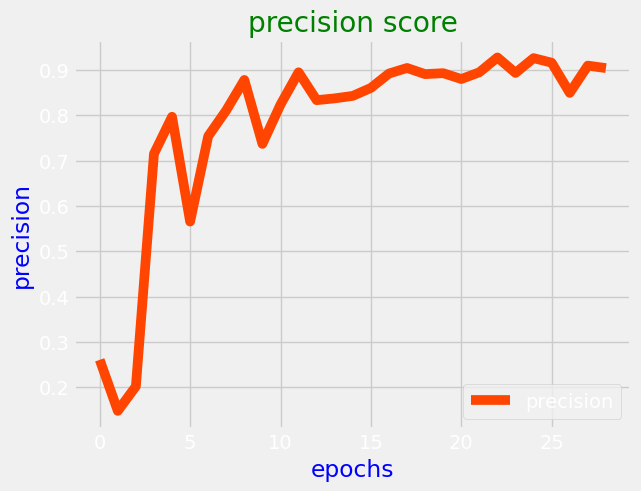

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(data['metrics/precision(B)'] , linewidth =7 , c='orangered' , label = 'precision')
plt.title("precision score" , color='green')
plt.xlabel("epochs" , color='blue')
plt.ylabel("precision", color='blue')
plt.legend()
plt.show()

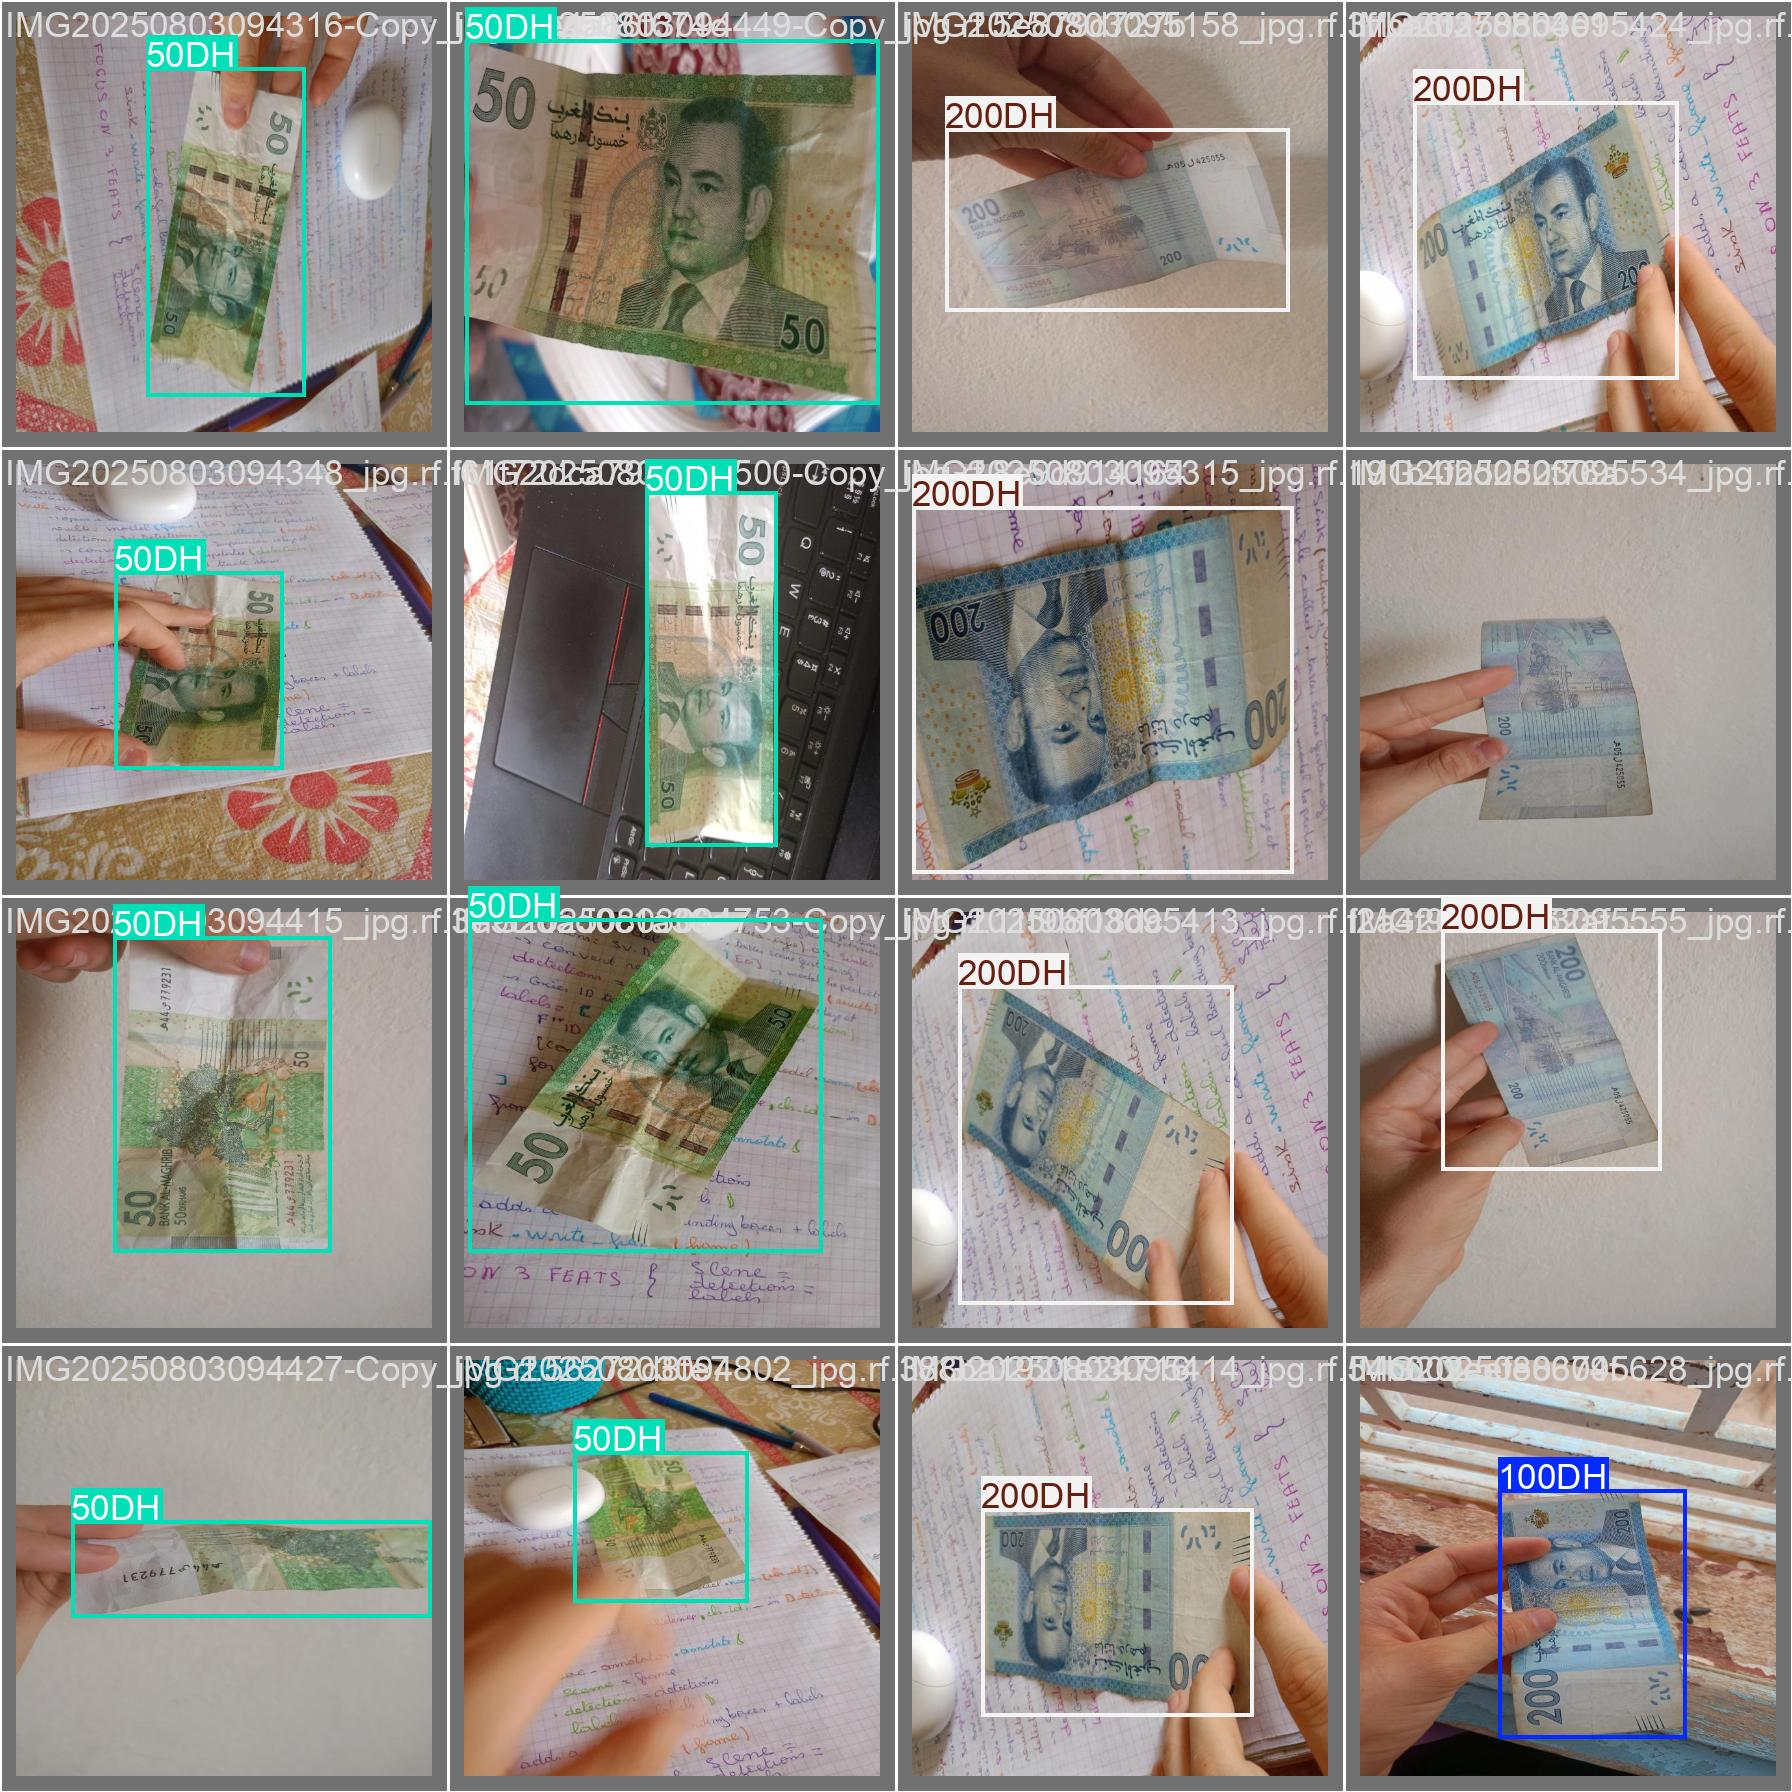

In [55]:
val_batch = '/content/runs/detect/train/val_batch0_labels.jpg'
display(Image(filename = val_batch , height = 650 , width = 1200))

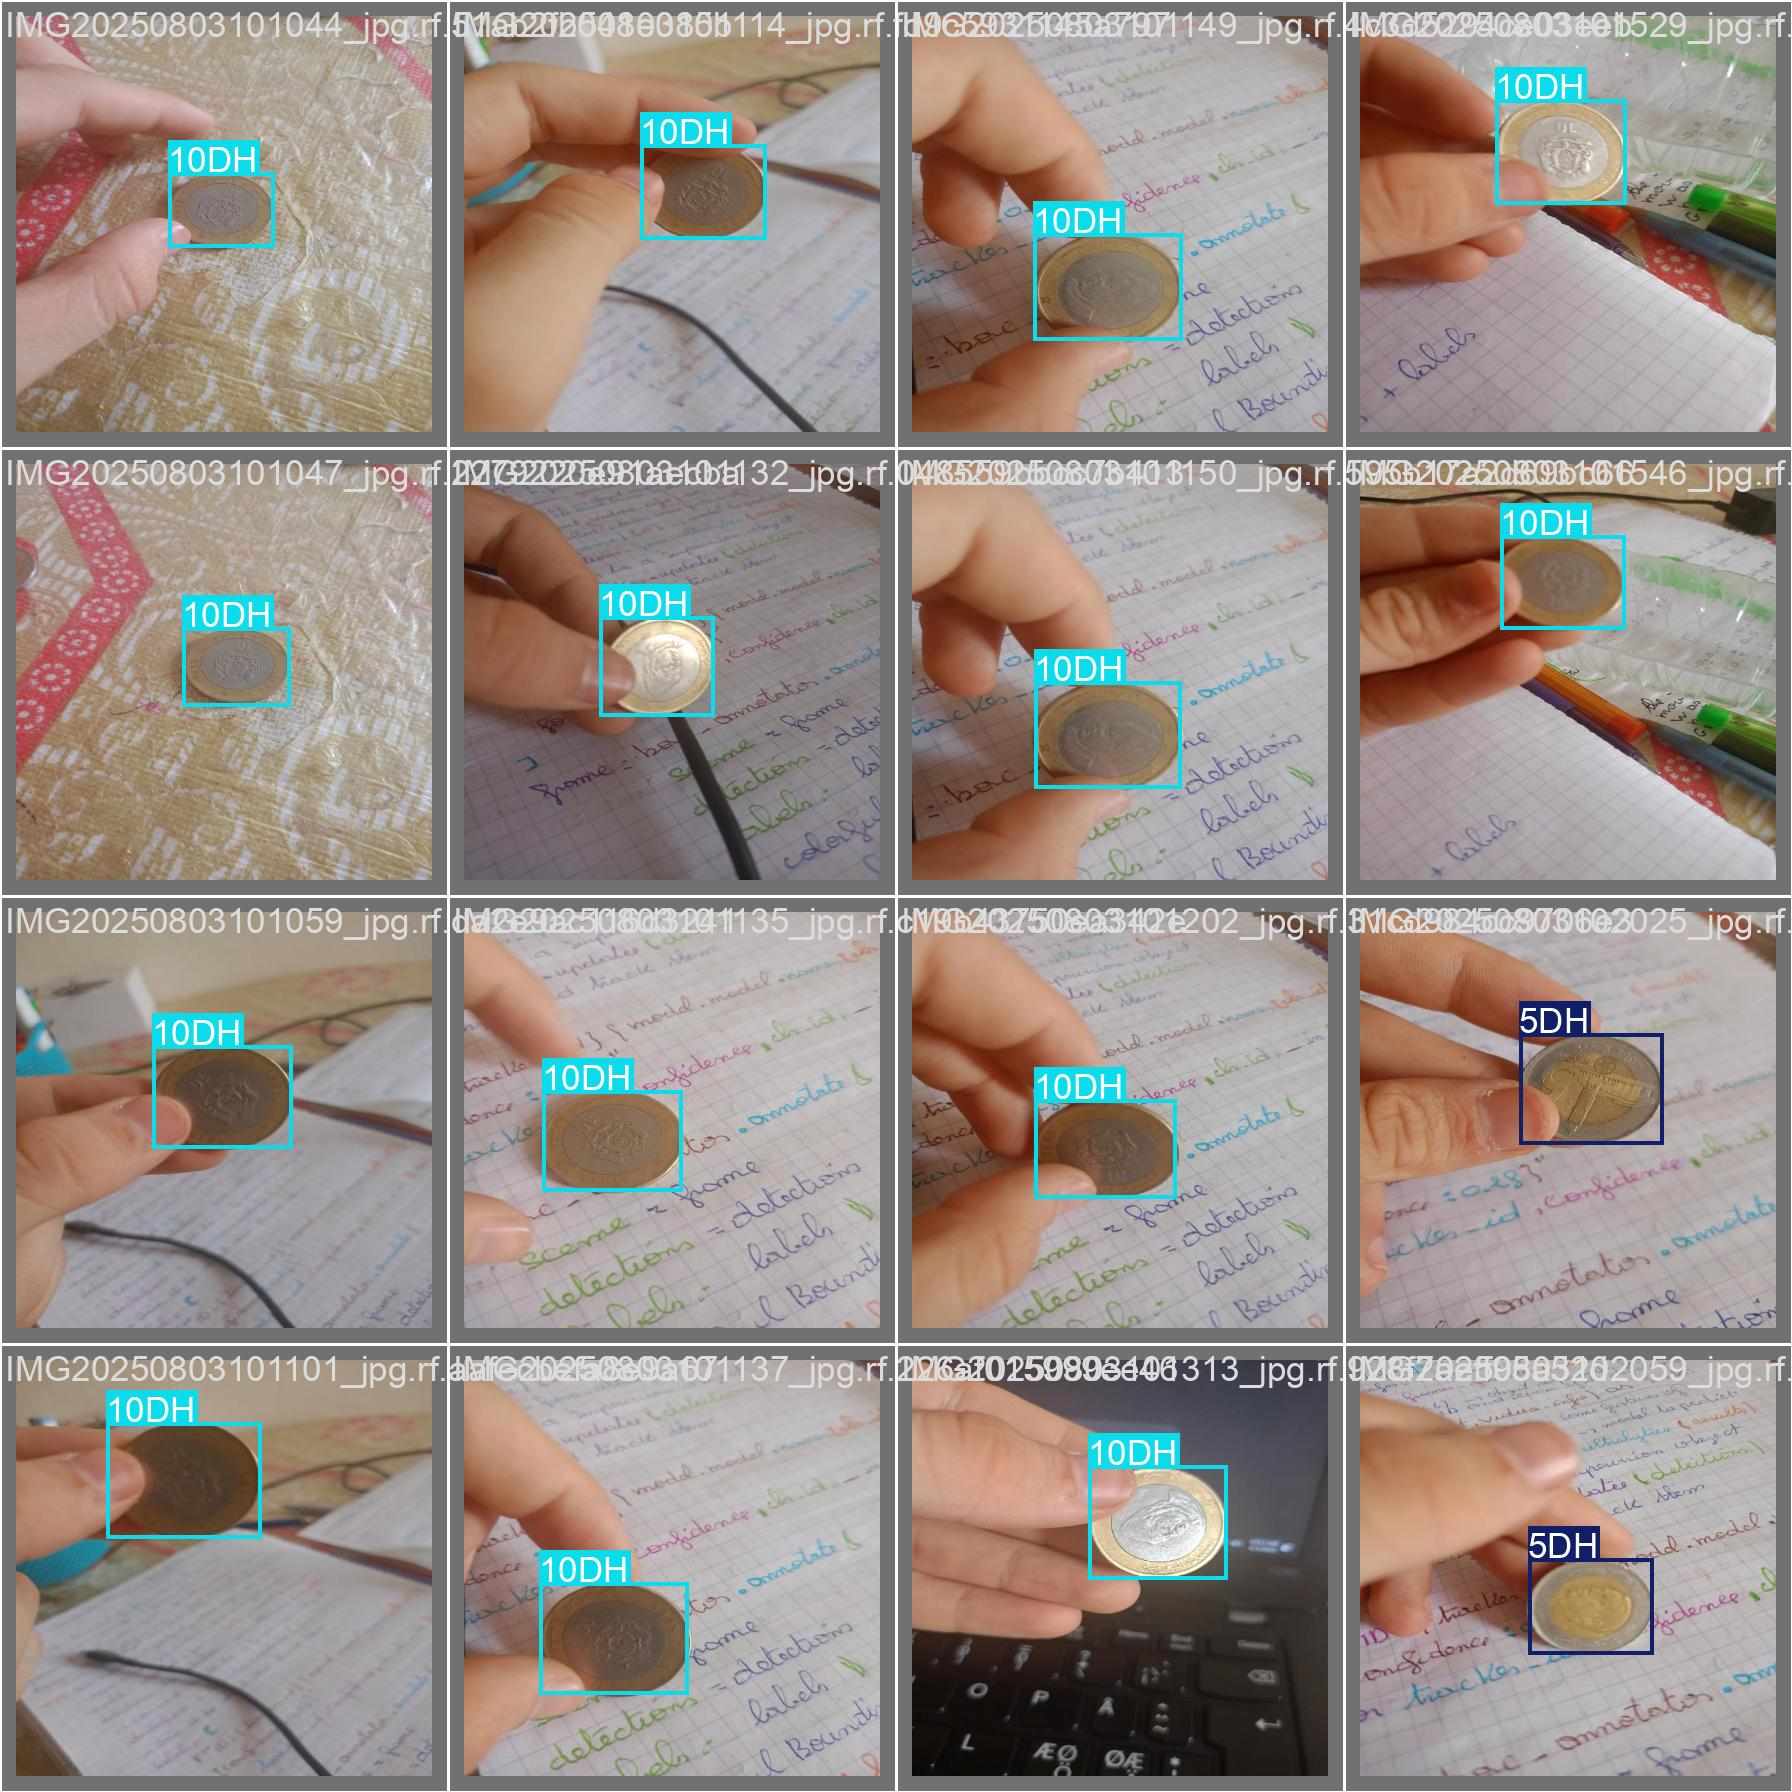

In [57]:
vbatch1 = '/content/runs/detect/train/val_batch1_labels.jpg'
display(Image(filename = vbatch1, height = 650 , width = 1200))


image 1/1 /content/50dh.jpg: 416x320 1 50DH, 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 3.8ms postprocess per image at shape (1, 3, 416, 320)
Results saved to runs/detect/predict


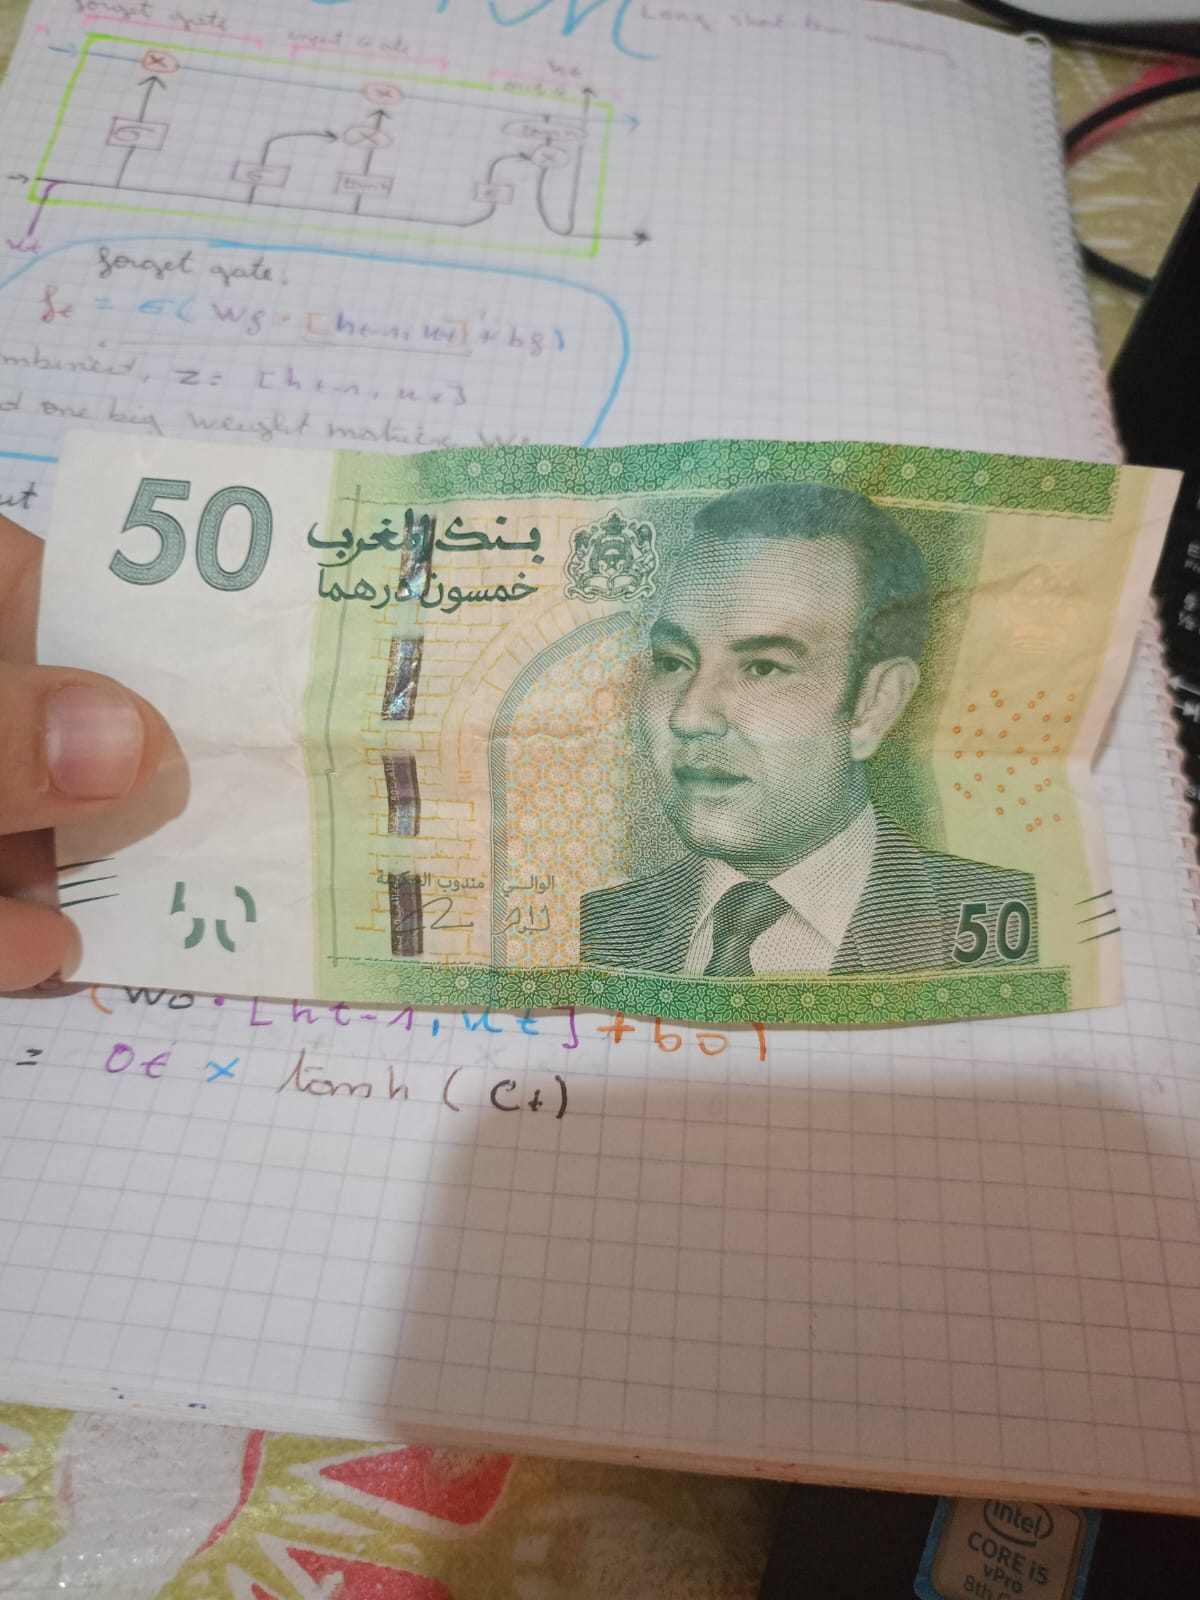

In [61]:
img_test = '/content/50dh.jpg'
results = best_model.predict(source = img_test , save = True)
display(Image(filename= img_test , height = 700 , width = 1200))

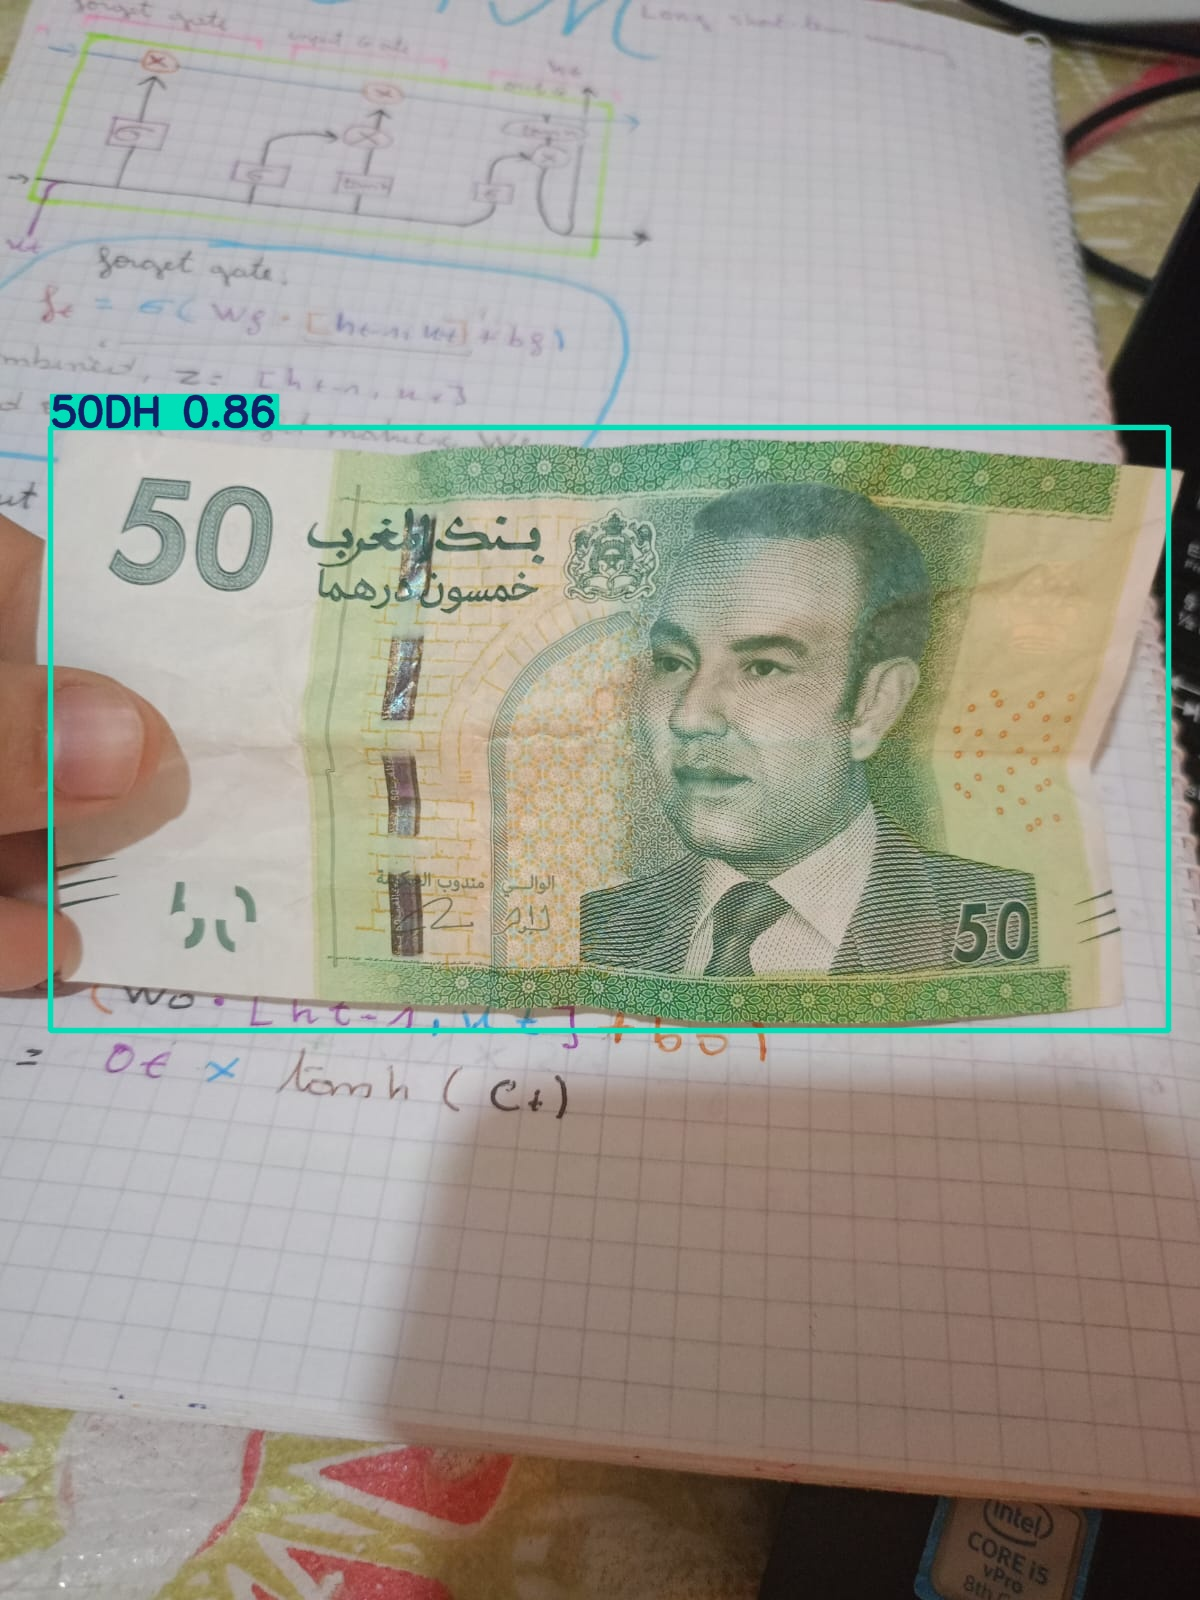

In [62]:
tested = '/content/runs/detect/predict/50dh.jpg'
display(Image(filename = tested, height = 700 , width = 1200))

In [ ]:
video = '/content/video coins.mp4'
best_model.predict(source = video, save = True )

In [ ]:
video2 = '/content/objcts.mp4'
best_model.predict(source = video2, save = True )

In [66]:
img2 = '/content/dirhams.jpg'
results2 = best_model.predict(source = img2 , save = True)


image 1/1 /content/dirhams.jpg: 416x256 2 100DHs, 2 200DHs, 56.9ms
Speed: 3.1ms preprocess, 56.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 256)
Results saved to runs/detect/predict


In [68]:
best_model.predict(source = '/content/50-10-5.jpg' , save = True)


image 1/1 /content/50-10-5.jpg: 416x256 1 10DH, 1 50DH, 1 5DH, 49.0ms
Speed: 2.5ms preprocess, 49.0ms inference, 4.4ms postprocess per image at shape (1, 3, 416, 256)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '100DH', 1: '10DH', 2: '200DH', 3: '50DH', 4: '5DH'}
 obb: None
 orig_img: array([[[ 56,  55,  65],
         [ 57,  56,  66],
         [ 58,  57,  67],
         ...,
         [  6,   2,   7],
         [  6,   2,   7],
         [  6,   2,   7]],
 
        [[ 57,  56,  66],
         [ 57,  56,  66],
         [ 59,  58,  68],
         ...,
         [  6,   2,   7],
         [  6,   2,   7],
         [  6,   2,   7]],
 
        [[ 58,  57,  67],
         [ 58,  57,  67],
         [ 59,  58,  68],
         ...,
         [  6,   2,   8],
         [  6,   2,   7],
         [  6,   2,   7]],
 
        ...,
 
        [[141, 140, 130],
         [141, 140, 130],
         [141, 139, 131],
         ...,
         [115, 113, 112],
         [114, 112, 111],
         [114, 112, 111]],
 
        [[139, 140, 130],
         [139, 140, 130],
         [141, 